In [48]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
#File Path
review_file = 'C:/Users/sdrsh/Videos/yelp_dataset/reviews.csv'
import pandas as pd
#Columns to extract
columnnames = ['unnamed','business_id','cool','date','funny','review_id', 'stars','text','useful','user_id']
csv_file = pd.DataFrame(pd.read_csv(review_file,names=columnnames))
#Extracting texts and stars fileld remotely and store it to a list
texts = csv_file.text.tolist()
stars = csv_file.stars.tolist()
#Converting string elements in the star list to value
for i in range(len(stars)):
    if type(stars[i]) == str:
        stars[i] = eval(stars[i])
#stars=eval(stars)
stars.pop(0)
texts.pop(0)
csv_file.head(5)

C:\Users\sdrsh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,4,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,unnamed,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,NaN,business_id,cool,date,funny,review_id,stars,text,useful,user_id
1,0.0,ikCg8xy5JIg_NGPx-MSIDA,0.0,2018-01-09 20:56:38,0.0,yi0R0Ugj_xUx_Nek0-_Qig,5.0,Went in for a lunch. Steak sandwich was delici...,0.0,dacAIZ6fTM6mqwW5uxkskg
2,1.0,eU_713ec6fTGNO4BegRaww,0.0,2013-01-20 13:25:59,0.0,fdiNeiN_hoCxCMy2wTRW9g,4.0,I'll be the first to admit that I was not exci...,0.0,w31MKYsNFMrjhWxxAb5wIw
3,2.0,3fw2X5bZYeW9xCz_zGhOHg,5.0,2016-05-07 01:21:02,4.0,G7XHMxG0bx9oBJNECG4IFg,3.0,Tracy dessert had a big name in Hong Kong and ...,5.0,jlu4CztcSxrKx56ba1a5AQ
4,3.0,zvO-PJCpNk4fgAVUnExYAA,1.0,2010-10-05 19:12:35,1.0,8e9HxxLjjqc9ez5ezzN7iQ,1.0,This place has gone down hill. Clearly they h...,3.0,d6xvYpyzcfbF_AZ8vMB7QA


In [49]:
for i in range(0,4):
    print(stars[i])

5.0
4.0
3.0
1.0


In [50]:
for j in range(0,4):
    print(texts[i])
    print('--------------------------------------------->')

This place has gone down hill.  Clearly they have cut back on staff and food quality

Many of the reviews were written before the menu changed.  I've been going for years and the food quality has gone down hill.

The service is slow & my salad, which was $15, was as bad as it gets.

It's just not worth spending the money on this place when there are so many other options.
--------------------------------------------->
This place has gone down hill.  Clearly they have cut back on staff and food quality

Many of the reviews were written before the menu changed.  I've been going for years and the food quality has gone down hill.

The service is slow & my salad, which was $15, was as bad as it gets.

It's just not worth spending the money on this place when there are so many other options.
--------------------------------------------->
This place has gone down hill.  Clearly they have cut back on staff and food quality

Many of the reviews were written before the menu changed.  I've been g

In [51]:
from collections import Counter
#Sorting the list by number of star counts
def balance_classes(text, star):
    sorted_stars = Counter(star)

    #The data is unbalanced, this may lead to biased classification, finding the stars with least occurance count
    minimum_star_count = sorted_stars.most_common()[-1][1]
    #initialize the value field to zero
    num_added = {clss: 0 for clss in sorted_stars.keys()}
    new_stars = []
    new_texts = []
    #loop to balance the list based on least star count
    for i, y in enumerate(star):
        if num_added[y] < minimum_star_count:
            new_stars.append(y)
            new_texts.append(text[i])
            num_added[y] += 1
    return new_texts, new_stars


C:\Users\sdrsh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


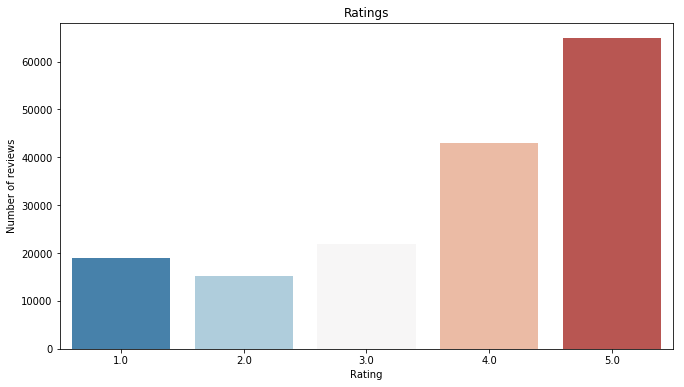

Counter({5.0: 64894, 4.0: 42942, 3.0: 21970, 1.0: 18972, 2.0: 15267})


In [52]:
fig = plt.figure(figsize=(11,6))
#Plotting the occurance of the stars
Stars=Counter(stars)
index = [i for i in Stars.elements()]
values = [Stars[i] for i in Stars.elements()]
sns.barplot(index, values, palette=sns.color_palette("RdBu_r", len(Stars)))
plt.xlabel('Rating')
plt.ylabel('Number of reviews')
plt.title('Ratings')

plt.show()
print(Counter(stars))

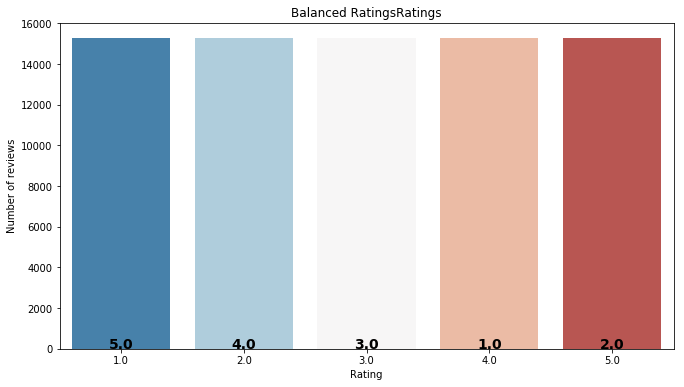

Counter({5.0: 15267, 4.0: 15267, 3.0: 15267, 1.0: 15267, 2.0: 15267})


In [53]:
balanced_text, balanced_star = balance_classes(texts, stars)
fig = plt.figure(figsize=(11,6))
#to plot the balanced star counts
Balanced_Stars=Counter(balanced_star)
index = [i for i in Balanced_Stars.elements()]
values = [Balanced_Stars[i] for i in Balanced_Stars.elements()]
sns.barplot(index, values, palette=sns.color_palette("RdBu_r", len(Stars)))
for i,v in enumerate(Balanced_Stars):
    plt.text(i,v*1.02, str(v),horizontalalignment='center',fontweight='bold',fontsize=14)

plt.xlabel('Rating')
plt.ylabel('Number of reviews')
plt.title('Balanced RatingsRatings')

plt.show()
print(Counter(balanced_star))

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Using tfidf vectorizer to convert text data to single words and bi-grams 
tfidfvectorizer = TfidfVectorizer(ngram_range=(1,2))
 
# Fitting the words and transforming the textual data to vector values in a multi dimentional array
vectors_values = tfidfvectorizer.fit_transform(balanced_text)

[1.0, 2.0, 2.0, 1.0, 1.0]
[1.0, 2.0, 1.0, 1.0, 2.0]


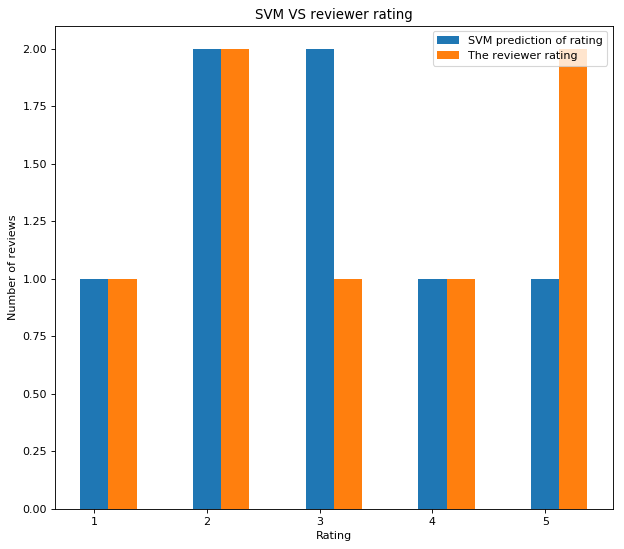

In [55]:
from sklearn.model_selection import train_test_split
#Splitting test and train set with 20% and 80% of data
X_train, X_test, y_train, y_test = train_test_split(vectors_values, balanced_star, test_size=0.2, random_state=42)

from sklearn.svm import LinearSVC
import numpy as np 
#Using SVM classifier with default kernal
SVMclassifier = LinearSVC()
 
# train the classifier
SVMclassifier.fit(X_train, y_train)
#Predict the test to verify
predict = SVMclassifier.predict(X_test)
predict_list=list(predict[:5])
y_test_plot=y_test[:5]
print(list(predict[:5]))
print(y_test[:5])
fig = plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
#Plotting test vs training set
x_range = np.arange(5)
width = 0.25

plt.bar(x_range+1, predict_list, width)
plt.bar(x_range+1 + width, y_test_plot, width)


plt.xlabel('Rating')
plt.ylabel('Number of reviews')
plt.title('SVM VS reviewer rating')
plt.legend(['SVM prediction of rating', 'The reviewer rating'])

plt.show()

In [56]:
from sklearn.metrics import accuracy_score
#Prnting the accuracy of prediction
print(accuracy_score(y_test, predict))

0.5896377808344796


              precision    recall  f1-score   support

         1.0       0.67      0.76      0.71      3048
         2.0       0.51      0.46      0.49      3025
         3.0       0.54      0.48      0.51      3144
         4.0       0.52      0.50      0.51      3003
         5.0       0.68      0.74      0.71      3047

   micro avg       0.59      0.59      0.59     15267
   macro avg       0.58      0.59      0.58     15267
weighted avg       0.58      0.59      0.58     15267

12
         1.0       0.67      0.76      0.71      3048
[0.67, 0.76, 0.71]
         2.0       0.51      0.46      0.49      3025
[0.51, 0.46, 0.49]
         3.0       0.54      0.48      0.51      3144
[0.54, 0.48, 0.51]
         4.0       0.52      0.50      0.51      3003
[0.52, 0.5, 0.51]
         5.0       0.68      0.74      0.71      3047
[0.68, 0.74, 0.71]


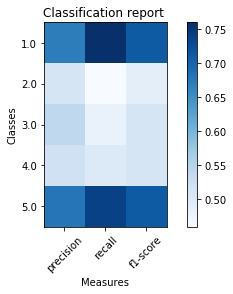

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))
#Classification report for better visualization of output
def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):
#Printing classification report in graphical form
    lines = cr.split('\n')

    classes = []
    plotMat = []
    print(len(lines))
    for line in lines[2 : (len(lines) - 5)]:
        print(line)
        t = line.split()
        # print t
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)


    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')
sampleClassificationReport=classification_report(y_test, predict)
plot_classification_report(sampleClassificationReport)


In [58]:
from sklearn.metrics import confusion_matrix
#Printing confustion matrix
print(confusion_matrix(y_test, predict))

[[2328  577  104   17   22]
 [ 865 1403  597  112   48]
 [ 198  646 1511  631  158]
 [  38   99  511 1505  850]
 [  38   25   79  650 2255]]


In [59]:
#Considering 1,2,4 and 5 star for classification. 1 and 2 means negative, 4 and 5 means positive
reduced = set([1,2,4,5])

In [60]:
#Getting train and test set for stars
reduced_train_is = [i for i, y in enumerate(y_train) if y in reduced]
reduced_test_is = [i for i, y in enumerate(y_test) if y in reduced]
 
# convert the train set
X_train2 = X_train[reduced_train_is, :]
y_train2 = [y_train[i] for i in reduced_train_is]
#If star is 1 or 2 then negative else positive
y_train2 = ["n" if (y == 1 or y == 2) else "p" for y in y_train2]
 
# convert the test set
X_test2 = X_test[reduced_test_is, :]
y_test2 = [y_test[i] for i in reduced_test_is]
#If star is 1 or 2 then negative else positive
y_test2 = ["n" if (y == 1 or y == 2) else "p" for y in y_test2]
#Fit the data for prediction
classifier.fit(X_train2, y_train2)
preds = classifier.predict(X_test2)
print(classification_report(y_test2, preds))

              precision    recall  f1-score   support

           n       0.96      0.95      0.95      6073
           p       0.95      0.95      0.95      6050

   micro avg       0.95      0.95      0.95     12123
   macro avg       0.95      0.95      0.95     12123
weighted avg       0.95      0.95      0.95     12123



In [64]:
vectorized = tfidfvectorizer.transform(texts)

In [65]:
print(classifier.predict(vectorized))

['p' 'p' 'p' ... 'p' 'n' 'p']


In [67]:
print(accuracy_score(y_test2, preds))

0.9548791553245897
